Epoch 10/100, Loss: 0.1758
Epoch 20/100, Loss: 0.0240
Epoch 30/100, Loss: 0.0071
Epoch 40/100, Loss: 0.0052
Epoch 50/100, Loss: 0.0049
Epoch 60/100, Loss: 0.0048
Epoch 70/100, Loss: 0.0047
Epoch 80/100, Loss: 0.0047
Epoch 90/100, Loss: 0.0046
Epoch 100/100, Loss: 0.0045
Prediction: [[0.23990141]
 [0.25006292]]


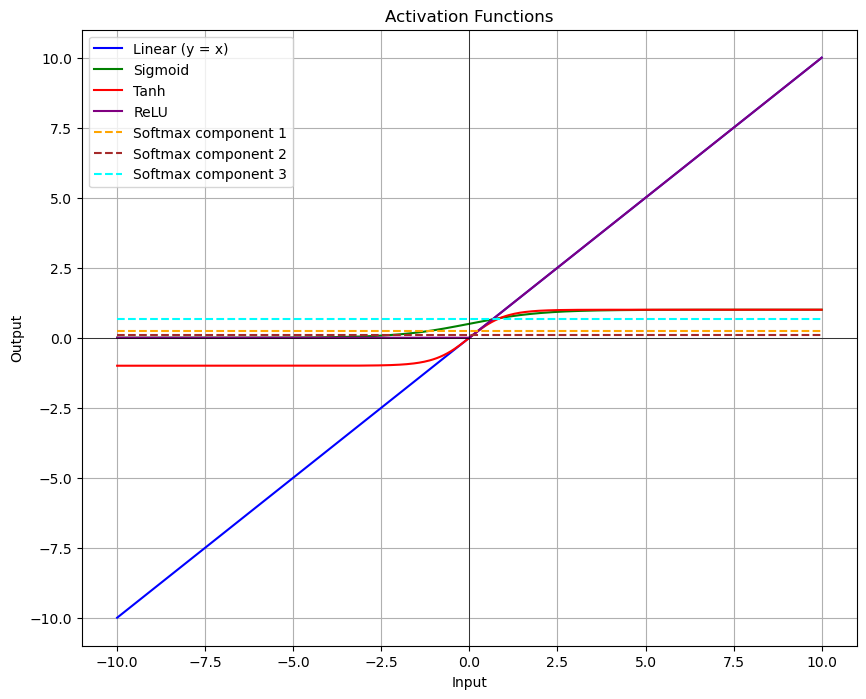

In [13]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        # Initialize weights randomly with small values
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.zeros((output_size, 1))

    def linear_activation(self, x):
        # Linear activation function: f(x) = x
        return x

    def predict(self, inputs):
        # inputs shape: (input_size, number_of_samples)
        z = np.dot(self.weights, inputs) + self.bias
        output = self.linear_activation(z)
        return output

    def train(self, inputs, targets, epochs=100):
        # inputs shape: (input_size, number_of_samples)
        # targets shape: (output_size, number_of_samples)
        for epoch in range(epochs):
            outputs = self.predict(inputs)
            error = targets - outputs
            # Update weights and bias using gradient descent
            self.weights += self.learning_rate * np.dot(error, inputs.T)
            self.bias += self.learning_rate * np.sum(error, axis=1, keepdims=True)
            # Optionally print loss
            loss = np.mean(error ** 2)
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

# Example usage
if __name__ == "__main__":
    # Define number of input neurons and output neurons
    input_neurons = 3
    output_neurons = 2

    # Create sample input (3 features, 4 samples)
    X = np.array([[0.1, 0.2, 0.3, 0.4],
                  [0.5, 0.6, 0.7, 0.8],
                  [0.9, 1.0, 1.1, 1.2]])

    # Create target output (2 outputs, 4 samples)
    Y = np.array([[0.3, 0.4, 0.5, 0.6],
                  [0.7, 0.8, 0.9, 1.0]])

    perceptron = Perceptron(input_size=input_neurons, output_size=output_neurons, learning_rate=0.01)
    perceptron.train(X, Y, epochs=100)

    # Test prediction
    test_input = np.array([[0.2], [0.4], [0.6]])  # shape (3,1)
    prediction = perceptron.predict(test_input)
    print("Prediction:", prediction)

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)

# Activation functions
linear = x
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)

# For softmax, since it operates on vectors, we apply it to a small batch of inputs.
# To visualize softmax, we'll apply softmax to 3 values at each x: [x, x-1, x+1]
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0))
    return exp_z / exp_z.sum(axis=0)

z = np.array([x, x - 1, x + 1])
softmax_vals = softmax(z)  # shape (3, 400)

plt.figure(figsize=(10, 8))

plt.plot(x, linear, label='Linear (y = x)', color='blue')
plt.plot(x, sigmoid, label='Sigmoid', color='green')
plt.plot(x, tanh, label='Tanh', color='red')
plt.plot(x, relu, label='ReLU', color='purple')

# Plot softmax outputs for each component
plt.plot(x, softmax_vals[0], label='Softmax component 1', linestyle='--', color='orange')
plt.plot(x, softmax_vals[1], label='Softmax component 2', linestyle='--', color='brown')
plt.plot(x, softmax_vals[2], label='Softmax component 3', linestyle='--', color='cyan')

plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()



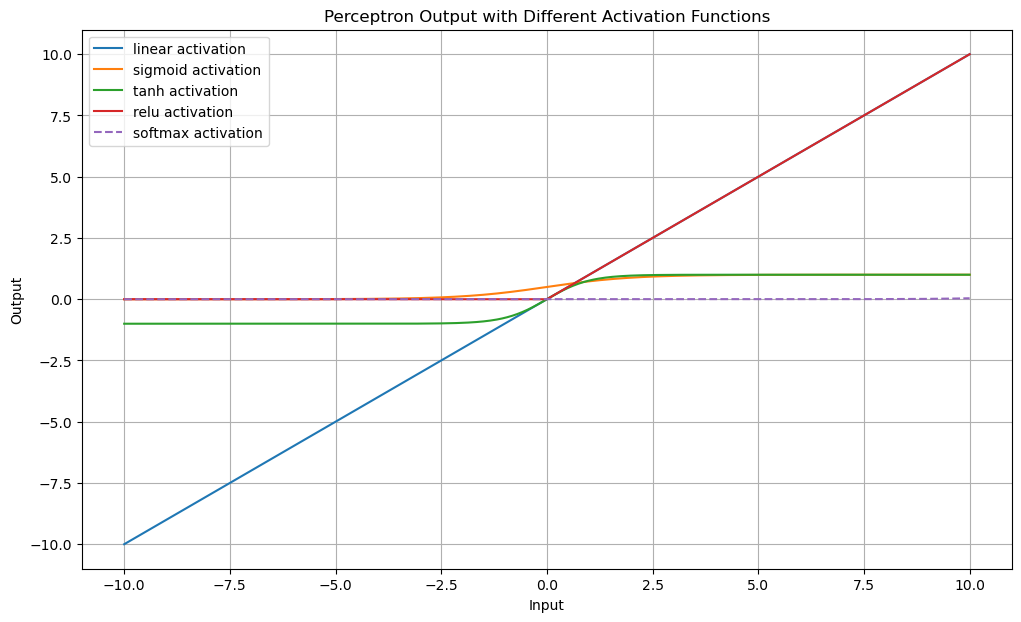